# Student Performance Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("StudentsPerformance.csv")

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df["Total_Score"]= df["math score"]+df["reading score"]+df["writing score"]

#####  Univariate Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
 8   Total_Score                  1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
Total_Score                    0
dtype: int64

So

In [8]:
def bar_pie(data):
    fig,ax=plt.subplots(1,2,figsize=(10,8))
    plt.suptitle("Univariate Analysis of "+data.name)
    data.value_counts().plot.bar(ax=ax[0])
    data.value_counts().plot.pie(ax=ax[1],autopct="%.2f%%")
    plt.show()

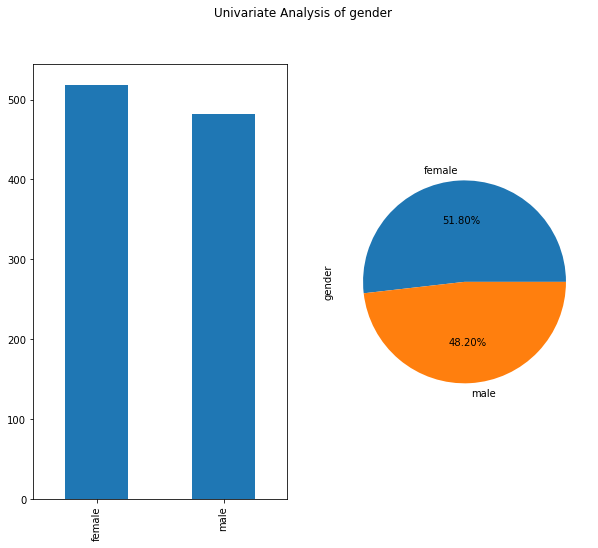

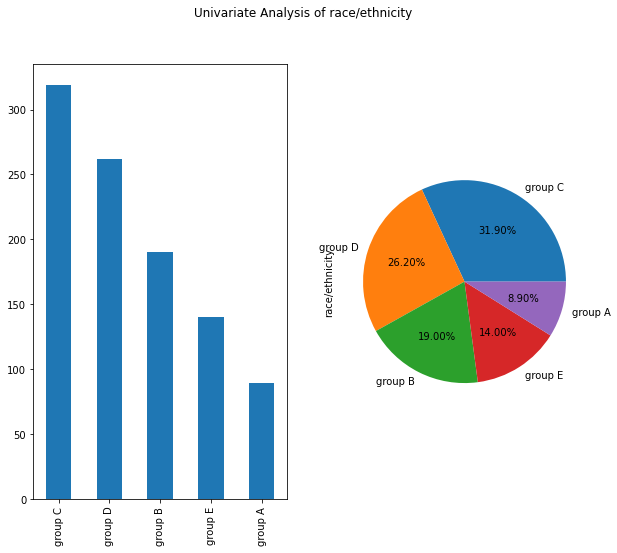

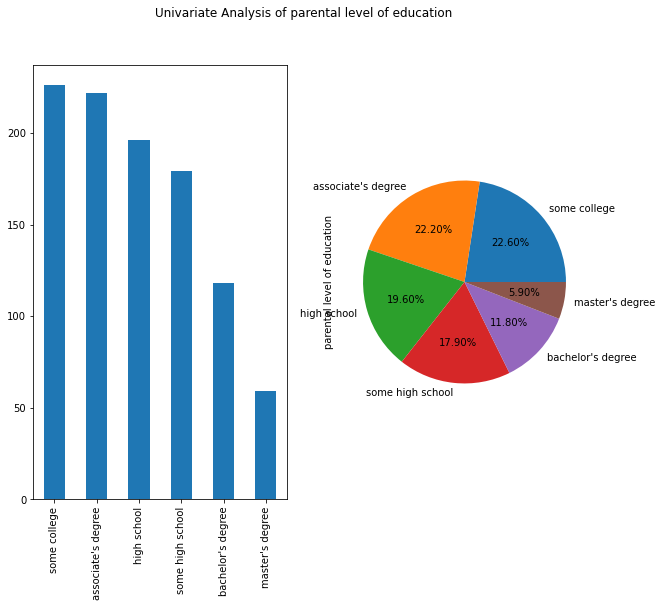

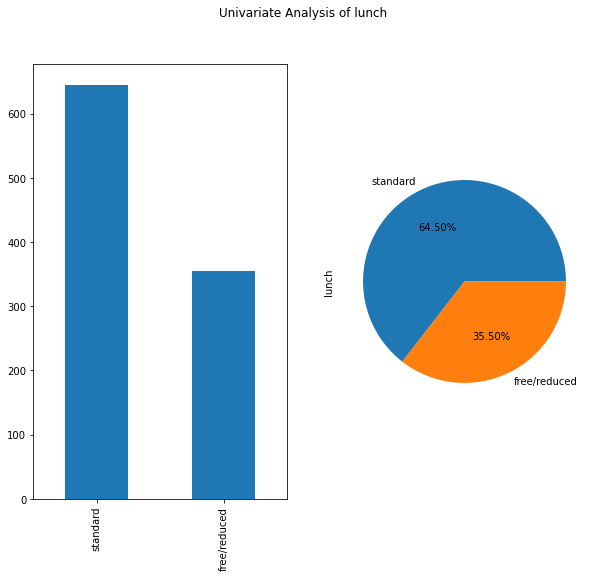

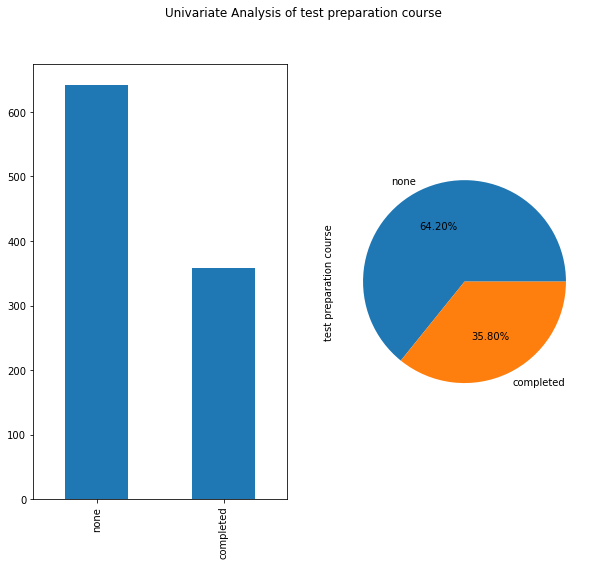

In [9]:
object_data=df.select_dtypes(object)
for i in object_data:
    bar_pie(df[i])

    1.In the school ratio between genders is almost same where number of female students are little bit more than the Male students 
    2.Most of the students enrolled in group C and group D making these groups the most popular and group A becomes the least popular group in schoool
    3.Most of the parents are holding college degrees and some are holding diplomas or associate.Majority of Parents having educational quallification untill college degrees and only approximately 17% Parents are highly educated
    4.Free Lunch option is available in the school and almost 35% students are getting this facility. Hence financial condition of majority of students are better than average 
    5. Only 35% students have completed pre exam course and rest of the students have not even opted for it 

In [10]:
numeric_df= df.select_dtypes(np.number)
numeric_df.head()

,math score,reading score,writing score,Total_Score
0,72,72,74,218
1,69,90,88,247
2,90,95,93,278
3,47,57,44,148
4,76,78,75,229


In [11]:
numeric_df.describe()

,math score,reading score,writing score,Total_Score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000
std,15.16308,14.600192,15.195657,42.771978
min,0.00000,17.000000,10.000000,27.000000
25%,57.00000,59.000000,57.750000,175.000000
50%,66.00000,70.000000,69.000000,205.000000
75%,77.00000,79.000000,79.000000,233.000000
max,100.00000,100.000000,100.000000,300.000000


In [12]:
def num_analysis(data):
    fig,ax= plt.subplots(1,3,figsize=(14,10))
    plt.suptitle ("Spread of "+data.name.capitalize())
    sns.distplot(data, ax=ax[0],kde=False)
    ax[0].axvline(data.median(),color='r', linestyle='dashed')
    ax[0].axvline(data.mean(),color='g', linestyle='solid')
    ax[0].legend({'Mean':data.mean(),'Median':data.median()})
    sns.boxplot(x=data,ax=ax[1],showmeans=True)
    sns.violinplot(data,ax=ax[2])
    plt.show()

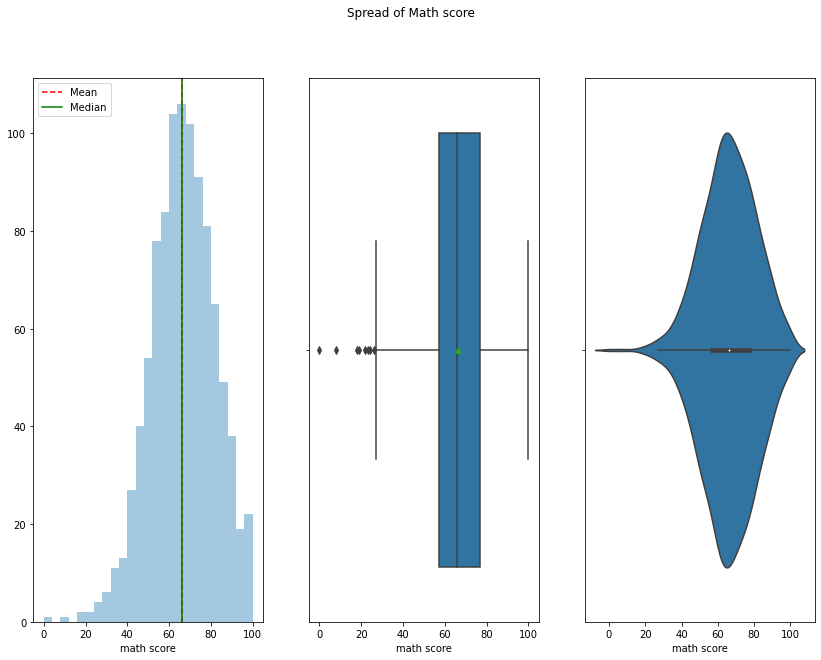

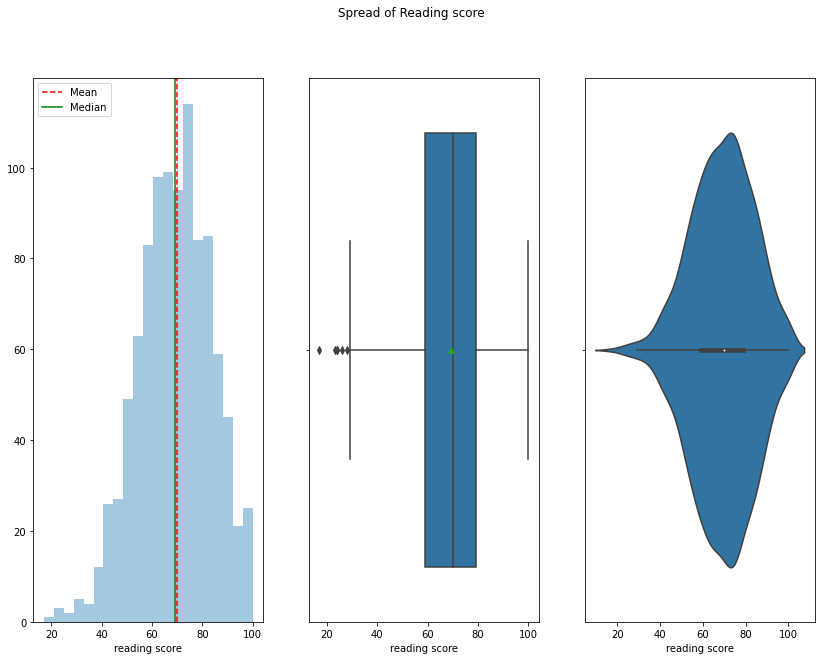

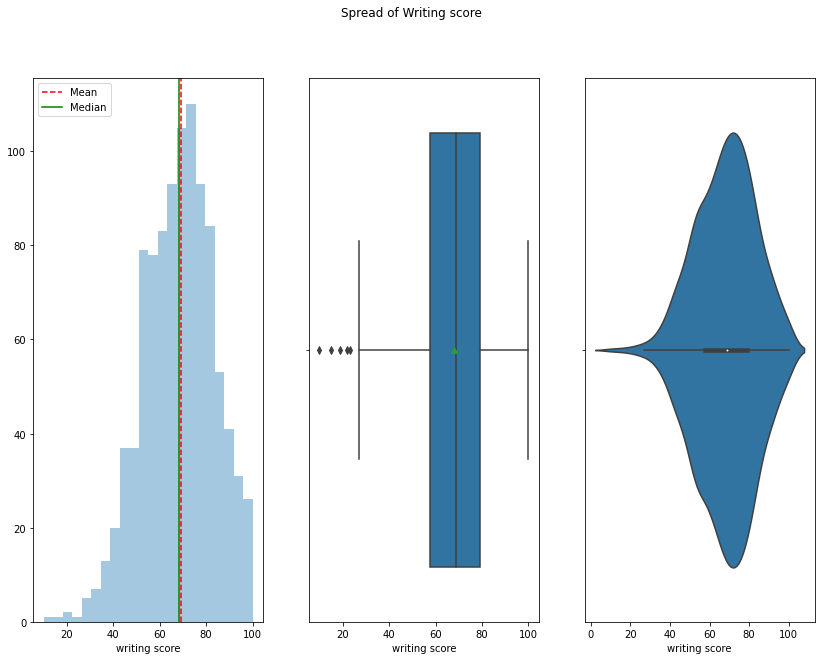

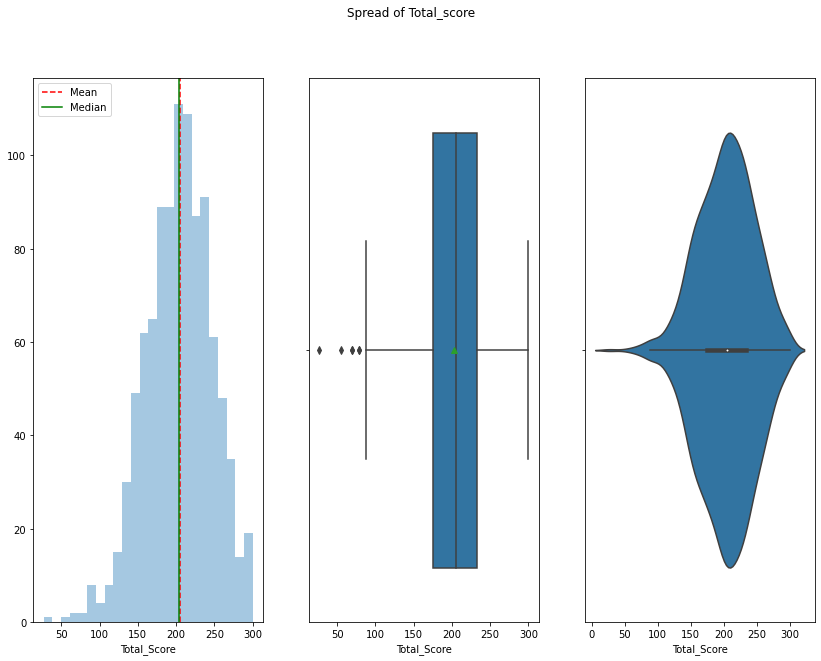

In [13]:
for i in numeric_df.columns:
    num_analysis(numeric_df[i])

Observation:
    
            1. Very few people got lesser than 40 in maths where mean and median score is almost same which is 66.                    Nobody got 0 in maths 
            2. Average reading score marks is around 70 and very few people got lesser than 45 and higher than 95
            3. Some outliers are spotted for students scoring lesser than 25 in writing scores.Majority of Students
               securing 60 to lesser than 80
            4. Full marks are obtained by students. Very few students scored lesser than 125 and accordingly outliers
               are spotted as majority of score are in the range of 150-250. 50% of students have scored 175-233 

#### Bivariate Analysis

In [15]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [16]:
#Gender Vs Marks
df.groupby("gender").mean()

,math score,reading score,writing score,Total_Score
gender,,,,
female,63.633205,72.608108,72.467181,208.708494
male,68.728216,65.473029,63.311203,197.512448


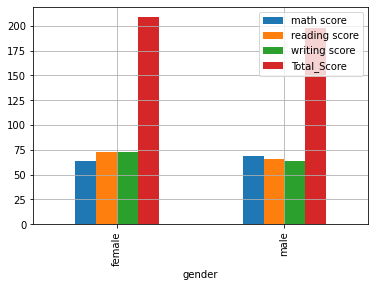

In [17]:
df.groupby("gender").mean().plot.bar()
plt.grid()

Observation:

            1. Female studens are performing better in all subjects and accordingly leading in total marks also 

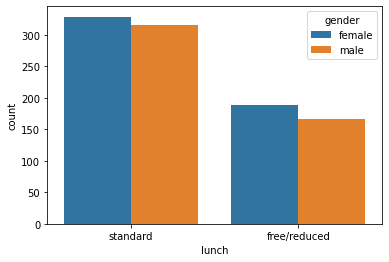

In [59]:
sns.countplot(data=df, x="lunch",hue="gender")

Observation:
    
            1. More females are having no or reduced lunch

In [18]:
#Groups Vs Marks
df.groupby("race/ethnicity").mean()

,math score,reading score,writing score,Total_Score
race/ethnicity,,,,
group A,61.629213,64.674157,62.674157,188.977528
group B,63.452632,67.352632,65.600000,196.405263
group C,64.463950,69.103448,67.827586,201.394984
group D,67.362595,70.030534,70.145038,207.538168
group E,73.821429,73.028571,71.407143,218.257143


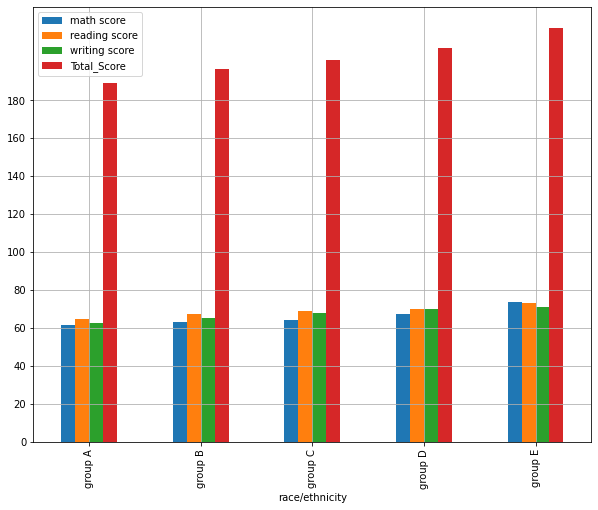

In [19]:
df.groupby("race/ethnicity").mean().sort_values(by="Total_Score").plot.bar(figsize=(10,8))
plt.grid()
plt.yticks(np.arange(0,200,20))
plt.show()

Students studying in group E follwed by group D are performing better than rest of the groups and students studying in
group A is having worst performance among all the groups

In [20]:
#Lunch service Vs Marks
df.groupby("lunch").mean()

,math score,reading score,writing score,Total_Score
lunch,,,,
free/reduced,58.921127,64.653521,63.022535,186.597183
standard,70.034109,71.654264,70.823256,212.511628


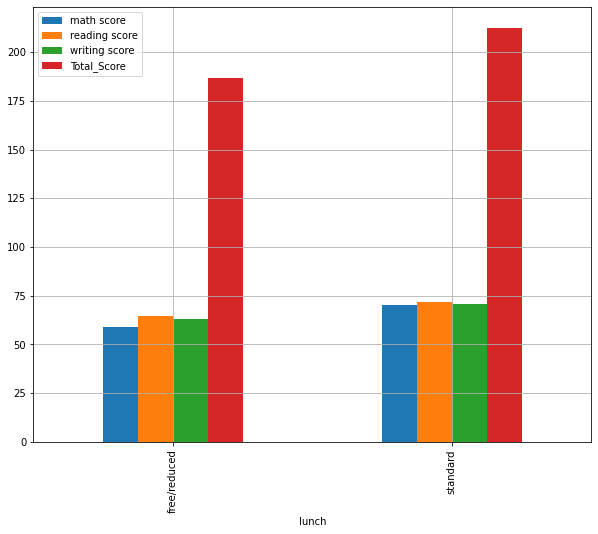

In [21]:
df.groupby("lunch").mean().plot.bar(figsize=(10,8))
plt.grid()

Observation:
            
            Students who are having no or reduced lunch are not able to perform well in exams than the students
            who are taking standard lunch. This is possible may be for the fact that students who are not having
            proper diet may fell sick and consequently scoring poor in exams  
            

In [22]:
#Parental education Vs Marks
df.groupby("parental level of education").mean()

,math score,reading score,writing score,Total_Score
parental level of education,,,,
associate's degree,67.882883,70.927928,69.896396,208.707207
bachelor's degree,69.389831,73.000000,73.381356,215.771186
high school,62.137755,64.704082,62.448980,189.290816
master's degree,69.745763,75.372881,75.677966,220.796610
some college,67.128319,69.460177,68.840708,205.429204
some high school,63.497207,66.938547,64.888268,195.324022


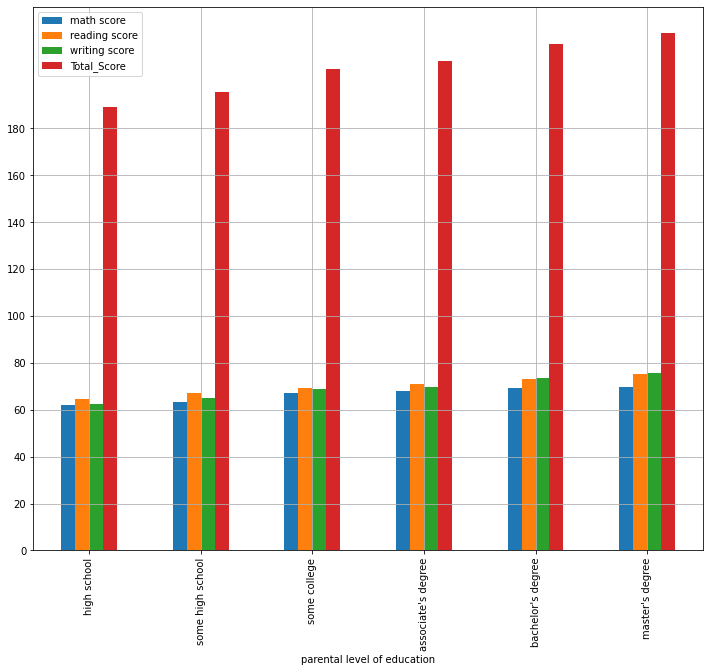

In [23]:
#Parental education Vs Marks
df.groupby("parental level of education").mean().sort_values(by="Total_Score").plot.bar(figsize=(12,10))
plt.yticks(np.arange(0,200,20))

plt.grid()

Observation:

            Higher the education of Parents, higher the marks of students. This is may be due to proper guidance 
            from their parents 

In [44]:
#Parental education Vs Marks
df.groupby("test preparation course").mean()

,math score,reading score,writing score,Total_Score
test preparation course,,,,
completed,69.695531,73.893855,74.418994,218.008380
none,64.077882,66.534268,64.504673,195.116822


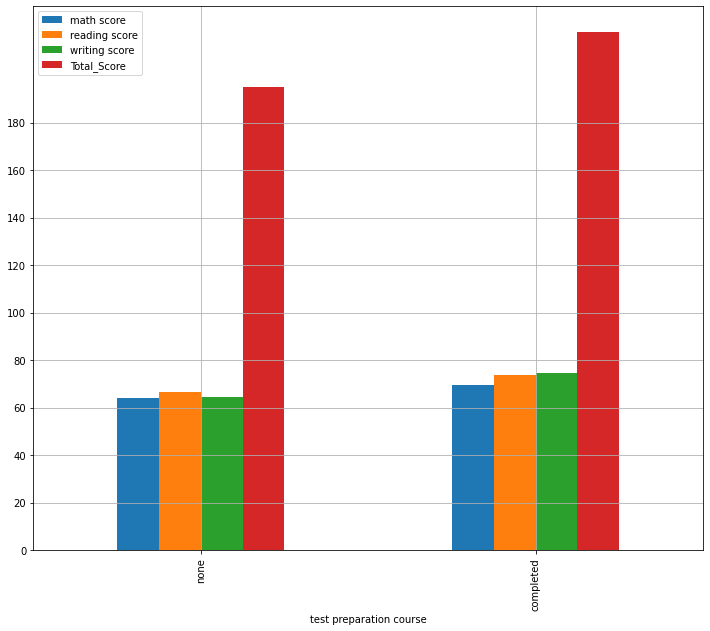

In [45]:
df.groupby("test preparation course").mean().sort_values(by="Total_Score").plot.bar(figsize=(12,10))
plt.yticks(np.arange(0,200,20))

plt.grid()

Observation:
            
            1. Students who have completed test preparation are doing significantly well final examination

In [24]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


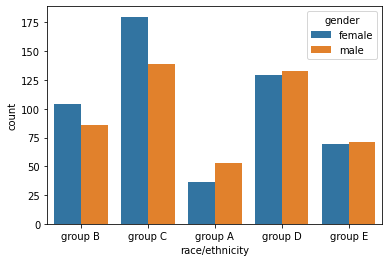

In [25]:
sns.countplot(data=df,x="race/ethnicity",hue="gender")

Female students are prefering Group B and C. Least popular group i.e Group E is having very less difference between
numbers of male and female students 

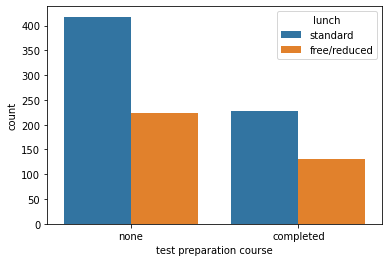

In [40]:
sns.countplot(data=df, x="test preparation course",hue="lunch")

Observation: 

            1. Majority of students who haven't taken full or reduced lunch are also not completed the test 
            preparation. Though some of them have completed the test but that is almost 50% of the ones who 
            completed

In [41]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

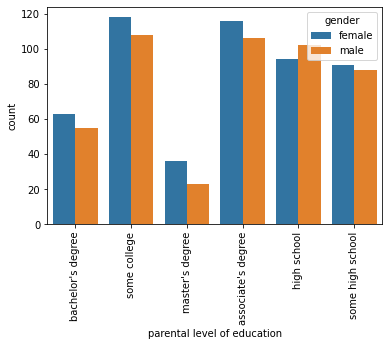

In [43]:
sns.countplot(data=df,x="parental level of education",hue="gender")
plt.xticks(rotation=90)

Observation:

        In all the groups except high school number of females are more. Significant difference is obtained in 
        higher education i.e in Master Degree. Number of male students are higher where parental level of education 
        is upto high school

In [49]:
pd.pivot_table(data=df,index="gender",columns="race/ethnicity",values="Total_Score")

race/ethnicity,group A,group B,group C,group D,group E
gender,,,,,
female,195.388889,202.528846,205.755556,214.317829,222.188406
male,184.622642,189.000000,195.748201,200.962406,214.436620


In each race Female student is leading in Total Marks obtained. 

In [55]:
pd.crosstab(index=df["parental level of education"],columns=[df["race/ethnicity"],df["gender"]])

race/ethnicity              group A      group B      group C      group D  \
gender                       female male  female male  female male  female   
parental level of education                                                  
associate's degree                6    8      23   18      45   33      24   
bachelor's degree                 3    9      11    9      26   14      13   
high school                       7   11      28   20      30   34      17   
master's degree                   2    1       5    1       7   12      15   
some college                      8   10      15   22      44   25      35   
some high school                 10   14      22   16      28   21      25   

race/ethnicity                   group E       
gender                      male  female male  
parental level of education                    
associate's degree            26      18   21  
bachelor's degree             15      10    8  
high school                   27      12   10  
master's degree                8       7    1  
some college                  32      16   19  
some high school              25       6   12

Conclusion:

            1. Female students are performing better than male students. 
            2. Faculties in Group D and Group E is handling their students very well and as a result students from 
            their groups are doing significantly better than the other groups 
            3. Higher the educational background of the parents, higher is the marks obtained by the students 
            4. Student/Administration is prefering mostly group C follwed by groud D
            5. Almost 35% students are having no or reduced lunch which is drastically affecting their performance
            6. Females are leading in having no or reduced lunch
            7. Math is the weakest subject among the students where score is fluctuating a lot 
            
            

Recommendation:

            1. More focus should be given to male students and selected female students who are having less marks
            to increase the overall performance
            2. Students/Parents and administration should be convinced to put more students in group E as their 
            academic performance is better than the others
            3. Information should be provided to parents to look after their children in other way incase they are 
            not having higher education background so that their children can learn from any different source or
            medium
            4. All the students mainly female students must be educated very well to have proper lunch as it will 
            reduce their chance of being sick and also it will help them to study more due to proper nutrition 
            which can increase their marks
            5. Good faculty must be hired for Mathematics as overall result is getting lower due to poor performance
            of students in Maths
            6. Special focus is to be given to group A as this group is drastically pulling down the entire 
            institution's performance